# Phenotype data preprocessing


**This tutorial contains examples on running the pink,blue,purple, and green section of the following diagram.**


> ../images/data_preprocessing.png (544.5 KiB):

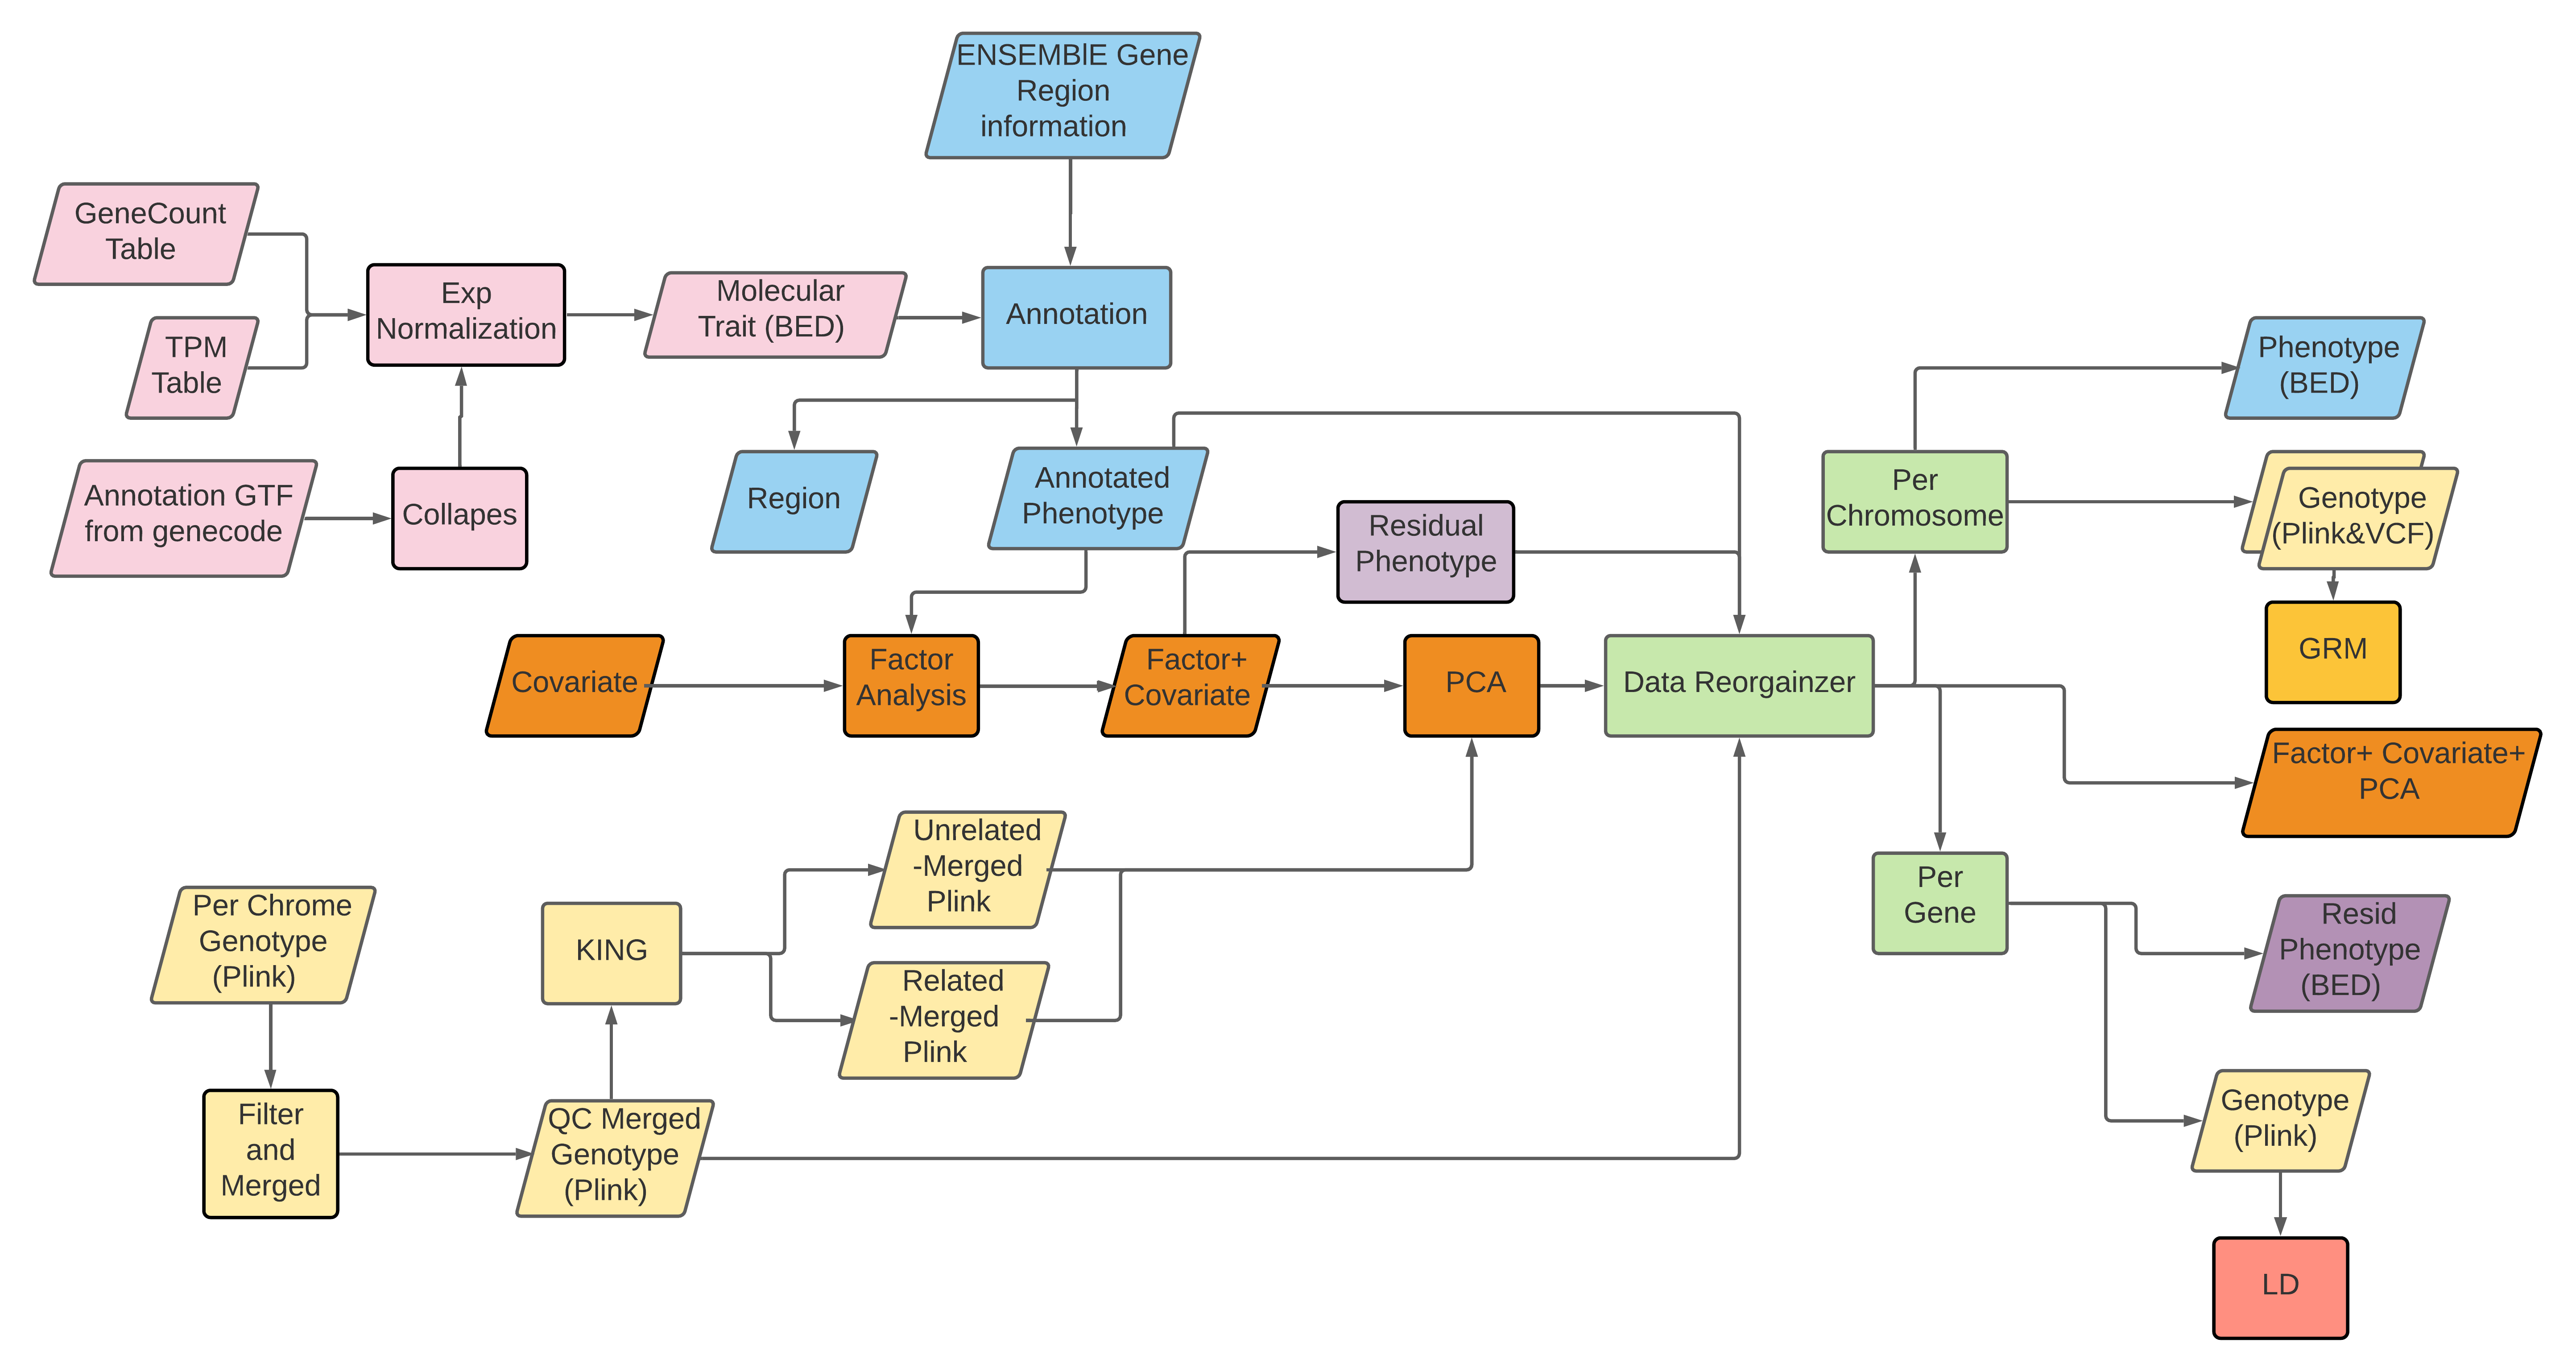

In [1]:
%preview ../images/data_preprocessing.png

## Annotation and region list generation


In [ ]:
sos run pipeline/gene_annotation.ipynb annotate_coord \
  --cwd data_preprocessing/MWE/phenotype_data \
  --phenoFile MWE.log2cpm.tsv \
  --annotation-gtf reference_data/genes.reformatted.gene.gtf \
  --sample-participant-lookup reference_data/sampleSheetAfterQC.txt \
  --container containers/rna_quantification.sif \
  --phenotype-id-type gene_name

In [ ]:
sos run pipeline/gene_annotation.ipynb region_list_generation \
    --cwd data_preprocessing/MWE/phenotype_data  \
    --phenoFile data_preprocessing/MWE/phenotype_data/MWE.log2cpm.bed.gz\
    --annotation-gtf reference_data/genes.reformatted.gene.gtf \
    --sample-participant-lookup reference_data/sampleSheetAfterQC.txt \
    --container containers/rna_quantification.sif \
    --phenotype-id-type gene_name

## Residual_Expression
After the covariate was merged with the PCs, the residual expression will be computed, so that the output of this step can be fed into PEER/BiCV module for factor analysis

In [ ]:
sos run pipeline/covariate_formatting.ipynb compute_residual \
        --cwd output/data_preprocessing/MWE/phenotype \
        --phenoFile data_preprocessing/MWE/phenotype_data/MWE.log2cpm.bed.gz \
        --covFile  data_preprocessing/MWE/covariates/MWE.covariate.cov.MWE.MWE.related.filtered.extracted.pca.projected.gz \
        --container containers/bioinfo.sif

## Phenotype reformmating
The phenotype file will be partioned into 1 bed.gz per chromosome

In [ ]:
sos run pipeline/phenotype_formatting.ipynb partition_by_chrom \
    --cwd data_preprocessing/MWE/phenotype_data  \
    --phenoFile data_preprocessing/MWE/phenotype_data/MWE.log2cpm.bed.gz \
    --region-list data_preprocessing/MWE/phenotype_data/MWE.log2cpm.region_list \
    --container containers/rna_quantification.sif \
    --mem 4G